In [1]:
%matplotlib ipympl

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import linregress
import matplotlib
font = {'size'   : 12}

matplotlib.rc('font', **font)
import time


In [3]:
import bluepysnap as bp
path_to_simulation = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/fullSSCx/longSim/compareModalities/f554be01-456c-4a15-8670-df39a3187b7e/0/'
s = bp.Simulation(path_to_simulation+'simulation_config.json')
population_name = s.reports['lfp_report'].population_names[0]

r  = s.reports['lfp_report'][population_name]

# types = list(s.circuit.nodes.property_values('mtype'))

# Load spikes

In [ ]:
regions = ['S1FL','S1DZ','S1DZO','S1HL','S1Sh','S1Tr','S1ULp']

types = np.sort(list(s.circuit.nodes.property_values('mtype')))

index = 0

path_to_spikes = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/fullSSCx/longSim/compareModalities/f554be01-456c-4a15-8670-df39a3187b7e/0/pkls/'

for region in regions:
    for t in types:
        
        report = pd.read_pickle(path_to_spikes+'/spikes_'+region+'_'+t+'.pkl')
        
        if index == 0:
            spikeReports = report
        else:
            spikeReports = pd.concat((spikeReports,report))
        

# Load signals

In [ ]:
   
EEGs = {}

f = path_to_simulation+'/pkls/eegs/'

for file in os.listdir(f):
    t = file.split('.')[0]
    EEGs[t] = pd.read_pickle(f+file)
    

In [ ]:
regions = ['S1FL','S1DZ','S1DZO','S1HL','S1Sh','S1Tr','S1ULp']

byRegion = {}

for region in regions:
    
    byRegion[region] = 0
    
    for key in EEGs.keys():
        if region in key:
            byRegion[region] += EEGs[key]


In [ ]:
eegTotal = 0
err = 0
for key, value in EEGs.items():
    eegTotal += value

        


# Plot signals

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)

plt.scatter(spikeReports.index,spikeReports.values,s=.1)
plt.gca().yaxis.set_visible(False)
plt.gca().xaxis.set_visible(False)
plt.xlim([2000,5000])

plt.subplot(2,1,2)

plt.plot(eegTotal['Forelimb_EEG_Reciprocity'])

for region in regions:
    plt.plot(byRegion[region]['Forelimb_EEG_Reciprocity'])
    
plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['Total signal']+regions)

plt.xlim([2000,5000])

plt.tight_layout()

plt.savefig('figures/eegByRegion.png',dpi=300)

<IPython.core.display.Javascript object>


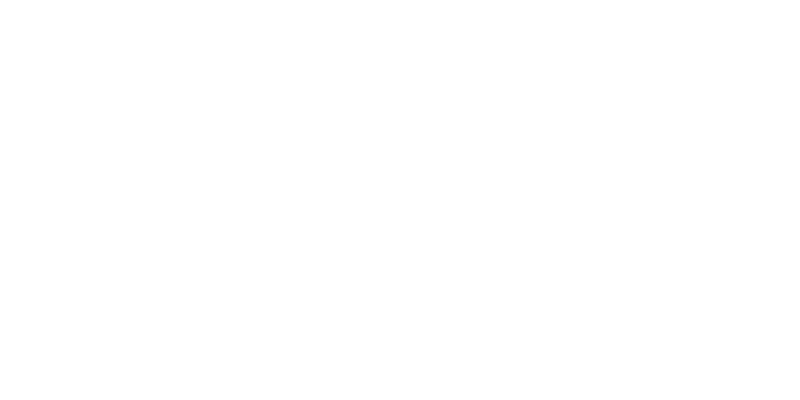

In [9]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)

plt.plot(eegTotal['Forelimb_EEG_Reciprocity'])
plt.plot(eegTotal['Forelimb_ECoG_Reciprocity'])


plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['EEG','ECoG'])
plt.tight_layout()
plt.xlim([2000,5000])

plt.subplot(1,2,2)

for i, region in enumerate(regions):
    plt.plot(byRegion[region]['Forelimb_ECoG_Reciprocity'],c='C'+str(i+1))
    
plt.xlabel('Time (ms)')
plt.tight_layout()
plt.xlim([2000,5000])
plt.legend(regions)

plt.savefig('figures/eegvsecog.png',dpi=300)

<IPython.core.display.Javascript object>


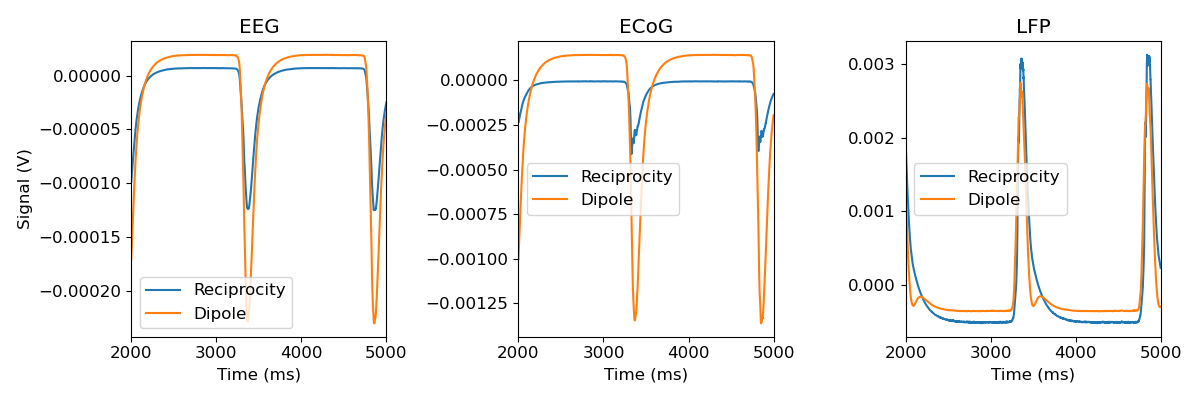

In [23]:
plt.figure(figsize=(12,4))


plt.subplot(1,3,1)

plt.plot(eegTotal['Forelimb_EEG_Reciprocity'])
plt.plot(eegTotal['Forelimb_EEG_Dipole'])
plt.xlabel('Time (ms)')
plt.xlim([2000,5000])
plt.ylabel('Signal (V)')
plt.legend(['Reciprocity','Dipole'])
plt.title('EEG')
plt.tight_layout()


plt.subplot(1,3,2)

plt.plot(eegTotal['Forelimb_ECoG_Reciprocity'])
plt.plot(eegTotal['Forelimb_ECoG_Dipole'])
plt.xlabel('Time (ms)')
plt.xlim([2000,5000])
plt.legend(['Reciprocity','Dipole'])
plt.title('ECoG')
plt.tight_layout()

plt.subplot(1,3,3)

plt.plot(eegTotal['Forelimb_LFP_Reciprocity'])
plt.plot(eegTotal['Forelimb_LFP_Dipole'])
plt.xlabel('Time (ms)')
plt.xlim([2000,5000])
plt.legend(['Reciprocity','Dipole'])
plt.title('LFP')
plt.tight_layout()

plt.savefig('figures/compareDipole.png',dpi=300)

<IPython.core.display.Javascript object>


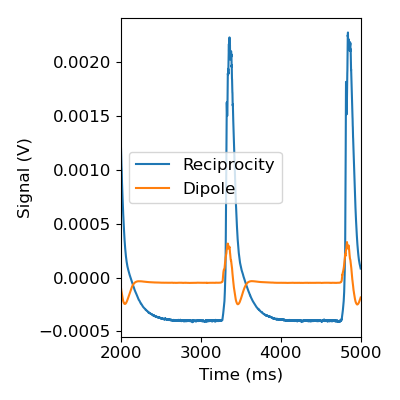

In [24]:
plt.figure(figsize=(4,4))
plt.plot(byRegion['S1FL']['Forelimb_LFP_Reciprocity'])
plt.plot(byRegion['S1FL']['Forelimb_LFP_Dipole'])
plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['Reciprocity','Dipole'])
plt.xlim([2000,5000])
plt.tight_layout()
plt.savefig('figures/LFPDipole.png',dpi=300)

# Samples cells from exemplary regions and gets scaling factors

In [4]:
circuit = s.circuit

In [5]:
nodes = circuit.nodes

In [6]:
nFl = nodes.get('S1FL',properties=['mtype'])
nHl = nodes.get('S1HL',properties=['mtype'])
nULp = nodes.get('S1ULp',properties=['mtype'])

In [7]:
Fl = next(nFl)[1]
Fl = np.array(list(Fl[Fl['mtype']=='L5_TPC:A'].index))[:,1].astype(int)

Hl = next(nHl)[1]
Hl = np.array(list(Hl[Hl['mtype']=='L5_TPC:A'].index))[:,1].astype(int)

ULp = next(nULp)[1]
ULp = np.array(list(ULp[ULp['mtype']=='L5_TPC:A'].index))[:,1].astype(int)

In [8]:
import h5py

In [12]:
coeffsFile = "/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/fullSSCx/ddfc78fe-e349-41e2-b000-1ff92bf0f1b5/0/coeffsEcog_EEG.h5"

coeffs = h5py.File(coeffsFile)

In [13]:
allNodeIds = coeffs['S1nonbarrel_neurons']['node_ids']

In [15]:
flIndex = np.where(np.isin(allNodeIds[:],Fl))[0]
hlIndex = np.where(np.isin(allNodeIds[:],Hl))[0]
ulpIndex = np.where(np.isin(allNodeIds[:],ULp))[0]


In [16]:
np.random.seed(1776)

flIndex = np.sort(np.random.choice(flIndex,1000,replace=False))
hlIndex = np.sort(np.random.choice(hlIndex,1000,replace=False))
ulpIndex = np.sort(np.random.choice(ulpIndex,1000,replace=False))




In [17]:
FLshort = allNodeIds[:][flIndex]
HLshort = allNodeIds[:][hlIndex]
ULPshort = allNodeIds[:][ulpIndex]

In [18]:
flOffsets = [coeffs['S1nonbarrel_neurons']['offsets'][:][flIndex],coeffs['S1nonbarrel_neurons']['offsets'][:][flIndex+1]]
hlOffsets = [coeffs['S1nonbarrel_neurons']['offsets'][:][hlIndex],coeffs['S1nonbarrel_neurons']['offsets'][:][hlIndex+1]]
ulpOffsets = [coeffs['S1nonbarrel_neurons']['offsets'][:][ulpIndex],coeffs['S1nonbarrel_neurons']['offsets'][:][ulpIndex+1]]


In [19]:
scaleFacFl = []
scaleFacHl = []
scaleFacULp = []

for i in range(len(flOffsets[0])):
    
    sfl = coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][flOffsets[0][i]:flOffsets[1][i]][:,1]
    sfl -= sfl[0]
    
    shl = coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][hlOffsets[0][i]:hlOffsets[1][i]][:,1]
    shl -= shl[0]
    
    sulp = coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][ulpOffsets[0][i]:ulpOffsets[1][i]][:,1]
    sulp -= sulp[0]

    scaleFacFl.append( sfl )
    scaleFacHl.append( shl )
    scaleFacULp.append( sulp )

# scaleFacFl = [s for item in scaleFacFl for s in item]
# scaleFacHl = [s for item in scaleFacHl for s in item]
# scaleFacULp = [s for item in scaleFacULp for s in item]

scaleFacFlEcog = []
scaleFacHlEcog = []
scaleFacULpEcog = []

for i in range(len(flOffsets[0])):
    
    sfl = coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][flOffsets[0][i]:flOffsets[1][i]][:,0]
    sfl -= sfl[0]
    
    shl = coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][hlOffsets[0][i]:hlOffsets[1][i]][:,0]
    shl -= shl[0]
    
    sulp = coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][ulpOffsets[0][i]:ulpOffsets[1][i]][:,0]
    sulp -= sulp[0]

    scaleFacFlEcog.append( sfl )
    scaleFacHlEcog.append( shl )
    scaleFacULpEcog.append( sulp )

# scaleFacFlEcog = [s for item in scaleFacFlEcog for s in item]
# scaleFacHlEcog = [s for item in scaleFacHlEcog for s in item]
# scaleFacULpEcog = [s for item in scaleFacULpEcog for s in item]


In [20]:
# len(flIndex)

In [21]:
# plt.figure()
# _, bins,_ = plt.hist(scaleFacFl,alpha=0.5,bins=100)
# plt.hist(scaleFacHl,alpha=0.5,bins=bins)
# plt.hist(scaleFacULp,alpha=0.5,bins=bins)

In [22]:
# plt.figure()
# _,bins,_ = plt.hist(scaleFacFlEcog,alpha=0.5,bins=100)
# plt.hist(scaleFacHlEcog,alpha=0.5,bins=bins)
# plt.hist(scaleFacULpEcog,alpha=0.5,bins=bins)

In [23]:
# plt.figure()
# _,bins,_ = plt.hist(scaleFacFl,alpha=0.5,bins=100)
# plt.hist(scaleFacFlEcog,alpha=0.5,bins=bins)


# Loads 3d positions

In [24]:
path_to_positions = "/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/fullSSCx/ddfc78fe-e349-41e2-b000-1ff92bf0f1b5/0/positions_all_new/"


In [25]:
allIds = [FLshort,HLshort,ULPshort]

allIds = [s for item in allIds for s in item]

allIds = np.array(allIds)

import os

i = 0
for subfolder in os.listdir(path_to_positions):
    for file in os.listdir(path_to_positions+subfolder):
        
        if i > 10:
            break
        
        positions = pd.read_pickle(path_to_positions+subfolder+'/'+file)
        
        columns = np.array(list(positions.columns))[:,0]
        
        indices = np.where(np.isin(allIds,columns))[0]
        
        if len(indices)==0:
            continue
        
        idsInFile = allIds[indices]

        positions = positions[idsInFile]
        
        if i == 0:
            allPositions = positions
        else:
            allPositions = pd.concat((allPositions,positions),axis=1)
            
        i += 1
        

In [26]:
ids = np.unique(np.array(list(allPositions.columns))[:,0])

In [27]:
def getNeuronSegmentMidpts(position):
    '''
    Gets midpoints for a single neuron
    '''

    
    secIds = np.array(list(position.columns))
    uniqueSecIds = np.unique(secIds)

    for sId in uniqueSecIds: # Iterates through sections

        pos = position.iloc[:,np.where(sId == secIds)[0]]

        if sId == 0: # Implies that section is a soma, so we just take the position from the file

            newPos = pos
 
        elif np.shape(pos.values)[-1] == 1: # If there is only one point in the section, we just take the value
            newPos = pd.concat((newPos,pos),axis=1)

        else: # We take the midpoints of the values in the file, which are the endpoints of the segments
            pos = (pos.iloc[:,:-1]+pos.iloc[:,1:])/2

            newPos = pd.concat((newPos,pos),axis=1)

    return newPos

In [28]:
ecog = np.array([3996,-777,-1292])
eeg = np.array([3996,-777,1860.97])
returnElectrode = np.array([2677,851,2275.32])

# Scaling factors for EEG electrode, reciprocity approach

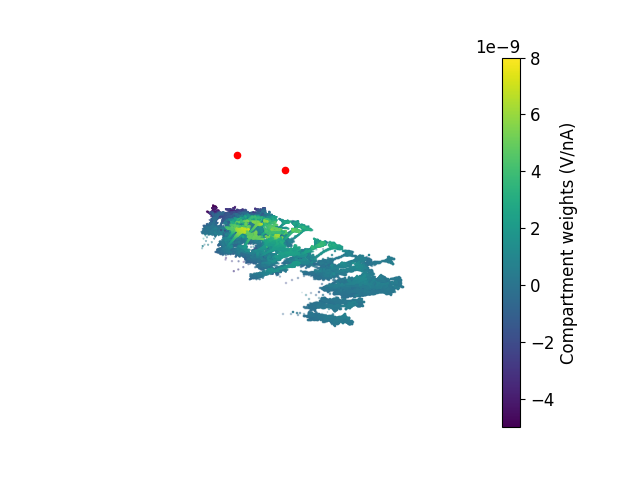

In [49]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in ids:
    
    if i in FLshort:
        region = FLshort
        marker = 'o'
        scaleFac = scaleFacFl
        color = 'C0'
    elif i in HLshort:
        region = HLshort
        marker = 'v'
        scaleFac = scaleFacHl
        color='C1'
    elif i in ULPshort:
        region = ULPshort
        marker ='s'
        scaleFac = scaleFacULp
        color='C2'
        
    index = np.where(region==i)[0][0]
    
    scale = scaleFac[index]
    
    p = getNeuronSegmentMidpts(allPositions[i]).values
        
#     p = allPositions[i].values
#     ax.scatter(p[0],p[1],p[2],marker=marker,c=color)
    im = ax.scatter(p[0],p[1],p[2],marker=marker,c=scale,vmin=-5e-9,vmax=8e-9,s=.5)
    
ax.view_init(elev=9., azim=-85)

ax.scatter(eeg[0],eeg[1],eeg[2],c='r',s=20)
ax.scatter(returnElectrode[0],returnElectrode[1],returnElectrode[2],c='r',s=20)

plt.axis('off')

plt.colorbar(im,label='Compartment weights (V/nA)')

plt.savefig('figures/eeg.png',dpi=300)

# Scaling factors for ECoG electrode, reciprocity approach

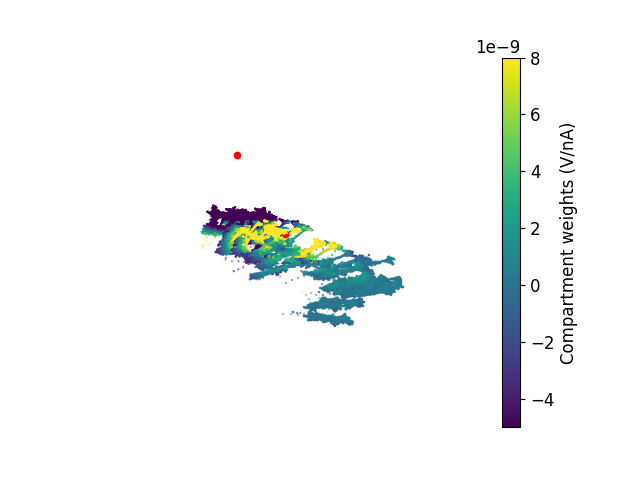

In [48]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in ids:
    
    if i in FLshort:
        region = FLshort
        marker = 'o'
        scaleFac = scaleFacFlEcog
        color = 'C0'
    elif i in HLshort:
        region = HLshort
        marker = 'v'
        scaleFac = scaleFacHlEcog
        color='C1'
    elif i in ULPshort:
        region = ULPshort
        marker ='s'
        scaleFac = scaleFacULpEcog
        color='C2'
        
    index = np.where(region==i)[0][0]
    
    scale = scaleFac[index]
    
    p = getNeuronSegmentMidpts(allPositions[i]).values
#     p = allPositions[i].values
#     ax.scatter(p[0],p[1],p[2],marker=marker,c=color)
    im = ax.scatter(p[0],p[1],p[2],marker=marker,c=scale,vmin=-5e-9,vmax=8e-9,s=.5)
    
ax.view_init(elev=9., azim=-85)

ax.scatter(ecog[0],ecog[1],ecog[2],c='r',s=20)

ax.scatter(returnElectrode[0],returnElectrode[1],returnElectrode[2],c='r',s=20)

plt.colorbar(im,label='Compartment weights (V/nA)')

plt.axis('off')

plt.savefig('figures/ecog.png',dpi=300)